<a href="https://colab.research.google.com/github/suchismita-priya/netflix_movies_and_tvshows_clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Suchismita priyadarsinee

# **Project Summary -**

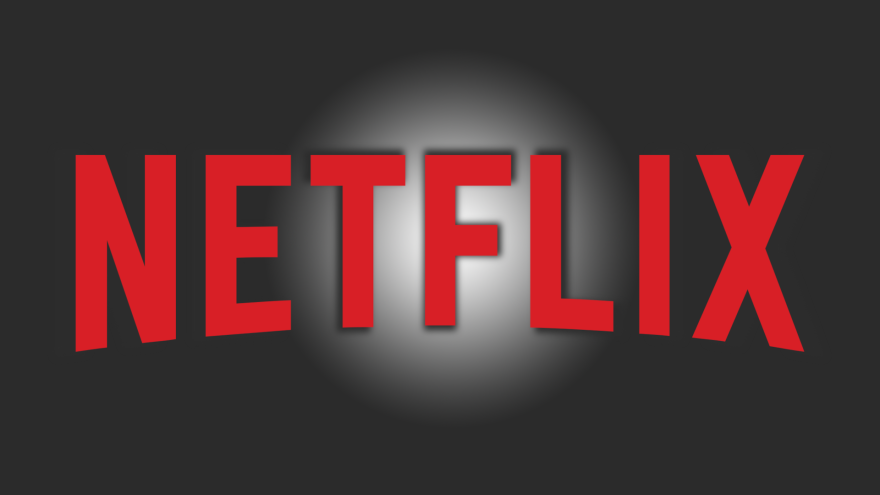

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In this project, i have to do

- Exploratory Data Analysis

- Understanding what type content is available in different countries

- Is Netflix has increasingly focusing on TV rather than movies in recent years.

- Clustering similar content by matching text-based features

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import chi2_contingency

! pip install contractions
import contractions
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')
!pip install neattext
import neattext.functions as nfx
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(2)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
row_col_count = df.shape

In [ ]:
print('Total row count',row_col_count[0])
print('Total column count',row_col_count[1])

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

### What did you know about your dataset?

This dataset contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title. It consists of 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description

**Attribute Information**

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['date_added'] = pd.to_datetime(df['date_added'])

df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

### What all manipulations have you done and insights you found?

We can gather the following insights from the dataset:

**Director:** There are missing values in the "Director" column.

**Country:** There are missing values in the "Country" column, which have been filled with zero.

**Cast:** There are missing values in the "Cast" column, which have been filled with "No cast."

**Date Added:** There are missing values in the "Date Added" column.

Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in each column has to find unique items from different columns.

**Date_addded Column:** In the "Date Added" column, additional information has been extracted such as the day, month, and year.

In summary, the dataset contains missing values in the director, country, cast, and date added columns. The missing values in the cast column have been filled with "No cast," and the missing values in the country column have been filled with zero. Duplicated entries have been identified, and the sum of values in one column is zero. Each column has different unique values. Additionally, the date added column has been parsed to extract the day, month, and year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
print(df.apply(lambda col: col.unique()))

In [ ]:
df.type.value_counts()

In [ ]:
# Chart - 1 visualization code
# piechart
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

The specific chart used in the code is a pie chart. I picked this chart because it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie."

##### 2. What is/are the insight(s) found from the chart?

There are more movies (69.05%) than TV shows (30.95%) in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

['TV Show','Movie']

[2410, 5377]

The data indicates a clear preference for movies over TV shows, with a significantly higher percentage of 69.05% compared to the lower percentage of 30.95% for TV shows.

This suggests that people tend to enjoy movies rather than investing their time in TV shows that may be less engaging.

#### Chart - 2

In [ ]:
df.head()

In [ ]:
# Chart - 2 visualization code
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(content_1.index,y=content_1.values , label='tv_show')
plt.scatter(content_2.index,y=content_2.values , label="Movies")
plt.xlabel("Year Added")
plt.ylabel("Number of Content")
plt.title("Number of TV Shows and Movies Added Over the Years")
plt.legend()

plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The line chart is suitable for showing the trend and distribution of data over a continuous axis (in this case, the years). It allows for easy comparison between the two categories (TV shows and movies) and how their counts vary over time.

##### 2. What is/are the insight(s) found from the chart?

The trend in the visualization indicates that between 2008 and 2022, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights indicate a positive impact for Netflix as the demand for both TV shows and movies on the platform has been increasing rapidly over the years. This growth presents an opportunity for Netflix to provide more high-quality content to its users, thereby enhancing user satisfaction and engagement.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# month_val = df["month_added"].value_counts().sort_index()
plt.figure(figsize=(15, 6))
df["month_added"].value_counts().plot(kind='bar')
plt.xlabel("Month Added")
plt.ylabel("Number of Content")
plt.title("Number of TV Shows and Movies Added Over the Months")
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is suitable for comparing and displaying categorical data (months) and their corresponding counts. The chart helps in understanding the distribution of content additions across different months and identifying any patterns or trends.

##### 2. What is/are the insight(s) found from the chart?

During the months of October to December, there is a noticeable surge in the number of TV shows and movies being released on the Netflix platform.The months of October to December are known for having various holidays and celebrations, such as Halloween, Diwali, Thanksgiving, and Christmas, which often result in people spending more time at home and seeking entertainment options

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the increase in TV shows and movies on the Netflix platform during the months of October to December can potentially create a positive business impact. Here are a few reasons:-

1-Meeting Seasonal Demand

2-Retaining Existing Subscribers

3-Attracting New Subscribers

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
plt.subplots(figsize=(15,6))
sns.countplot(x=df['month_added'],hue=df['type'])

##### 1. Why did you pick the specific chart?

on this countplot chart, we can easily see and compare the frequencies of TV show and movie additions for each month.

##### 2. What is/are the insight(s) found from the chart?

January, October, and December appear to be the trending months for movie additions on Netflix compared to other months.

October, November, and December having high ranked for TV show additions on Netflix compared to other months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the trending months for movies and TV shows on Netflix can potentially create a positive business impact:

1-Meeting Viewer Demand:

2-Capitalizing on Seasonal Trends:

3-Improved Competitiveness:

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
movies = df[df['type'] == 'Movie']
plt.subplots(figsize=(12, 5))

# Plot distplot for movies
sns.distplot(x=movies['duration'].str.extract('(\d+)'), hist=False, kde=True)
plt.title('Distribution of Duration for Movies')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The Distplot is a suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different duration ranges.

##### 2. What is/are the insight(s) found from the chart?

The average length of movies and TV shows falling within the range of 50 to 150 minutes can vary depending on the specific content available on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

1-Audience Flexibility : By offering movies and TV shows with a variety of lengths, ranging from shorter films to longer epic productions, Netflix can cater to the diverse preferences and schedules of its audience

2-Increased Engagement : Movies and TV shows with varying lengths provide options for viewers to choose content that fits their available time. This can lead to increased engagement and longer viewing sessions

3-Content Diversity : By including movies and TV shows of different lengths, Netflix can expand its content library and cater to various genres and storytelling formats.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
tv_shows = df[df['type'] == 'TV Show']
plt.subplots(figsize=(20, 5))

# Plot distplot for TV shows
sns.countplot(x=tv_show['duration'],order = tv_show['duration'].value_counts().index)
plt.title('Distribution of Duration for TV Shows')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes ,Positive Impact because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
df['originals'] = np.where(df['release_year'] == df['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
plt.subplots(figsize=(5,5))
explode = (0, 0.1)
df.originals.value_counts().plot(kind='pie',autopct='%1.2f%%',labels= ['Others', 'Originals'],shadow=True,explode=explode)
plt.ylabel('')
plt.title('Percentage of originals and others in movies')
plt.show()


##### 1. Why did you pick the specific chart?

The pie plot is a suitable choice for visualizing the distribution of categorical data, such as the proportion of "originals" and "others" in this case. It allows you to see the relative sizes of each category as a portion of the whole.

##### 2. What is/are the insight(s) found from the chart?

Out of the movies available on Netflix, 30% are Netflix originals, while the remaining 70% are movies that were released earlier through different distribution channels and subsequently added to the Netflix

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gaining insights can indeed help create a positive business impact. By understanding the distribution of movies on Netflix, such as the proportion of Netflix originals versus non-originals, the streaming service can make informed decisions about content acquisition and production.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
df['cast']

In [ ]:
singe_cast = df['cast'].str.split(',',expand=True).stack()
singe_cast.value_counts().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(15,6))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
top_TVshows_actor.value_counts().head(15).plot(kind='barh',color='g')
plt.grid(True)
plt.title('Top 15 TV shows actors')

In [ ]:
plt.figure(figsize=(15,6))

# seperating Movies actor from cast column
top_movies_actor = df[df['type']=='Movie']['cast'].str.split(',',expand=True).stack()
top_movies_actor.value_counts().head(15).plot(kind='barh',color='y')
plt.title('Top 15 Movie actors')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The horizontal orientation of the bars allows for easier reading and comparison of the values. The length of each bar represents the number of TV shows or movies an actor has appeared in. The chart also includes titles and is divided into two subplots, making it clear that one subplot represents TV shows and the other represents movies.

##### 2. What is/are the insight(s) found from the chart?

In the TV shows category, the actor with the highest appearance is Takahiro Sakurai. In the movies category, the actor with the highest appearance is Anupam Kher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,10))
df.listed_in.value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')
plt.ylabel(' ')

##### 1. Why did you pick the specific chart?

The pie chart's circular shape allows viewers to quickly compare the sizes of different genres by observing the relative areas of the slices. The accompanying labels and percentage values outside the slices provide additional information and enhance the readability of the chart.

##### 2. What is/are the insight(s) found from the chart?

In this chart, the top three genres on Netflix based on their distribution are:

1-Documentaries: 14.4%

2-Stand-up Comedy: 13.9%

3-Drama, International Movies:1 3.8%

These genres have the highest percentages compared to the other genres included in the top 10 list.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from analyzing the distribution of genres on Netflix can potentially help create a positive business impact in several ways

1-Content Curation : By focusing on genres that have high viewer demand, Netflix can ensure that it offers a diverse and appealing selection of movies and shows to its subscribers

2-Targeted Acquisitions and Productions : It can guide them in identifying genres that are in high demand and have a proven audience. This can optimize their investments in content creation and acquisition

3-Personalized Recommendations: Personalized recommendations for individual users, improving their overall experience and encouraging them to spend more time on the platform.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
conuntryVSgenre = df[['country', 'listed_in']]
top_countries = df['country'].value_counts().nlargest(10)
top_countries

In [ ]:
# Define the top 10 countries
country_list = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Egypt', 'Turkey']
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Iterate through the country list and create pie charts
for i, country in enumerate(country_list):
    # Filter the DataFrame for the current country
    country_df = df[df['country'] == country]

    # Split and explode the 'listed_in' column, then count the genres
    content_count = country_df['listed_in'].str.split(', ').explode().value_counts()

    # Plot a pie chart on the respective subplot
    row = i // 5
    col = i % 5
    axs[row, col].pie(content_count, labels=content_count.index, autopct='%1.1f%%')
    axs[row, col].set_title(f'Content Distribution in {country}')

# Show the subplots
plt.show()

##### 1. Why did you pick the specific chart?

It is suitable for showing the distribution of different genres across multiple countries. Each pie chart represents a country, and the slices of the pie represent different genres. The size of each slice indicates the proportion of content in that genre for a particular country. This allows for easy comparison of genre distribution across countries in a visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

Action & Adventure and Dramas are the most prevalent genres across all countries. They have the highest values in most countries, indicating their popularity.The United States has a diverse content offering across multiple genres, with a strong presence in Action & Adventure, Dramas, Comedies, and Documentaries.

India has a significant focus on Independent Movies and Dramas, with relatively fewer offerings in other genres.

The United Kingdom has a good balance between Drama, International TV Shows, and Documentaries.

Australia's content offering is diverse, with a relatively balanced distribution across various genres such as Dramas, Comedies, International TV Shows, and Documentaries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact in the following ways:

1-Targeted Content Strategy: By understanding the genre preferences in different countries, businesses can develop a targeted content strategy that aligns with the interests of their target audience.

2-Market Expansion:The insights can help businesses identify countries where their content genres are highly popular. This knowledge can guide expansion plans and investment in those markets, increasing the chances of success and profitability.

3-Content Localization: Understanding the genre preferences in different countries can aid in content localization efforts. Adapting content to suit the local preferences can increase its appeal and viewership, potentially leading to business growth.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
df.rating.nunique()

Variables Description- Rating

**TV-Y:** This rating means that the content is appropriate for all children. It is aimed at children aged 2-6 and may include educational programming.

**TV-Y7:** This rating means that the content is appropriate for children aged 7 and up. It may contain mild violence, comic mischief, or scary content that may not be suitable for younger children.

**TV-Y7-FV:** This rating means that the content is appropriate for children aged 7 and up, but may contain more intense violence. The "FV" stands for "fantasy violence".

**TV-G:** This rating means that the content is appropriate for all ages. It may contain mild language or violence, but nothing too intense.

**TV-PG:** This rating means that parental guidance is suggested. The content may contain material that parents might find inappropriate for younger children. It may include mild to moderate language, violence, or suggestive content.

**TV-14:** This rating means that the content is appropriate for viewers aged 14 and up. It may include intense violence, strong language, or sexual situations.

**TV-MA:** This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language.

**G-** This rating means that the content is appropriate for all ages. It is usually intended for young children and may include animated or family-friendly content.

**PG:** This rating means that parental guidance is suggested. The content may include mild violence, language, or suggestive themes.

**PG-13:** This rating means that the content is appropriate for teens aged 13 and up. It may include intense violence, language, or suggestive content.

**R:** This rating means that the content is intended for adults. It may include graphic violence, strong language, or nudity.

**NC-17:** This rating means that the content is intended for mature audiences only and may contain explicit sexual content or violence that is not suitable for minors.

**NR:** This rating means that no rating has been assigned yet or that the content is not rated by a particular board.

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Top 10 rating for different audiences & Rating based on Movie and Tv_Shows')

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10])

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart combination of two count plots allows for both univariate and bivariate analysis. The first plot provides insights into the top 10 ratings across all content, while the second plot offers a comparison of ratings specifically for movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

TV-MA: This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language

In terms of ratings, the most common rating is TV-MA, which applies to both movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that TV-MA is the most common rating for both movies and TV shows can inform content strategies, audience targeting, programming decisions, and content diversity to drive positive business impact in terms of increased viewership and customer satisfaction

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(20,6))
sns.countplot(x="director", data=df, hue='type', order=df['director'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title('Top 15 directors with highest number of Movies and Tv Shows')
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart effectively presents the data in an intuitive and visually appealing manner, allowing viewers to easily identify the directors with the most contributions on Netflix

##### 2. What is/are the insight(s) found from the chart?

The directors Raúl Campos and Jan Suter have the highest count in terms of overall Movies and TV shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
df['listed_in'].value_counts().head(15)

In [ ]:
plt.figure(figsize=(20,6))
df['listed_in'].value_counts().head(15).plot(kind='bar')
plt.title('Top 10 Average Genere with Count')
plt.xticks(rotation=90)
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart effectively presents the data, allowing viewers to easily compare the Average counts of different genres.

##### 2. What is/are the insight(s) found from the chart?

The average count of genres in the top 10 categories lies between 200-250. The genre with the highest count among all the genres is Documentaries, with a count of 334.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact for a streaming platform like Netflix or any other company in the entertainment industry.These insights, companies can refine their content strategies, enhance viewer satisfaction, attract a larger audience, and ultimately drive positive business impact in terms of increased viewership, customer retention, and revenue growth

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
age_order = df['rating'].unique()
age_order = [str(age) for age in age_order]
age_order.sort()
print(age_order)

In [ ]:
ratings = {
    'G': 'Kids',
    'NC-17': 'Adults',
    'NR': 'Adults',
    'PG': 'Older Kids',
    'PG-13': 'Teens',
    'R': 'Adults',
    'TV-14': 'Teens',
    'TV-G': 'Kids',
    'TV-MA': 'Adults',
    'TV-PG': 'Older Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults',
}
df['age_order'] = df['rating'].replace(ratings)

In [ ]:
age_order = df['age_order'].unique()
age_order = age_order[~pd.isna(age_order)]
country_order = df['country'].value_counts().head(10).index

In [ ]:
age_order

In [ ]:
df2 = df.copy()

In [ ]:
df.head(2)

In [ ]:
age_order

In [ ]:
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['age_order'],normalize = "index").T
df_heatmap

In [ ]:
# Define the order of countries and age groups
plt.figure(figsize=(15, 6))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain','Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",cbar=True,annot=True,fmt='1.0%',linewidth=4)
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### 2. What is/are the insight(s) found from the chart?

In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

1.France- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

2.India- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

3.United Kingdom -It has a relatively high level of interest among adults, with 51% expressing interest.

4.Mexico-Here ,also demonstrates a substantial level of interest, with 77% of adults showing interest in the subject.

5.South Korea , United States- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

6.Japan- It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

7.Canada- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France, India, and Mexico have higher levels of interest in the adults, while Canada has relatively lower interest compared to the other countries.

The gained insights can potentially help in creating a positive business impact, depending on the context and specific business goals.

1-Product Development

2-Market Expansion

3-Partnerships and Collaborations

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

pairplot is a type of data visualization that is particularly useful when dealing with datasets that contain multiple numerical features (variables). It provides a grid of scatterplots for each pair of numerical variables in your dataset, allowing you to visualize the relationships and correlations between them.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 16

In [ ]:
# visualization code
tv_shows = df[df['type']=='TV Show']
movies = df[df['type']=='Movie']

In [ ]:
tv_shows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)

In [ ]:
plt.figure(figsize=(20,6))
movies_year.plot(color='red',label="Movies / year",linewidth=3)
tv_shows_year.plot(color='blue',label="TV Shows / year",linewidth=3)
plt.xlabel("Years")
plt.ylabel("Number")
plt.legend()
plt.grid()
plt.title("Production growth yearly")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The number of movies on Netflix is growing significantly faster than the number of TV shows.

We saw a huge increase in the number of movies and television episodes after 2015.

there is a significant drop in the number of movies and television episodes produced after 2020.

It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement 1:**
"Netflix movies have a longer average duration (in minutes) compared to TV shows."

**Hypothetical Statement 2:**
"The release year of Netflix content is independent of the content type (Movie or TV Show)."

**Hypothetical Statement 3:**
"The distribution of TV show ratings is the same as the distribution of movie ratings on Netflix."

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**"Netflix movies have a longer average duration compared to TV shows."**

**Null Hypothesis (H0):** The average duration of movies and TV shows on Netflix is the same.

**Alternative Hypothesis (H1):** The average duration of movies on Netflix is longer than TV shows.

#### 2. Perform an appropriate statistical test.

In [ ]:
df['duration'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')

In [ ]:
# Perform Statistical Test to obtain P-Value
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(movies['duration'], tv_shows['duration'], equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in average duration between movies and TV shows.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in average duration between movies and TV shows.")


##### Which statistical test have you done to obtain P-Value?

We have performed a t-test to test this hypothesis.

##### Why did you choose the specific statistical test?

**Type of Data:** The data consists of numeric values, namely the durations of movies and TV shows. The t-test is designed for comparing means when dealing with continuous numerical data, making it a suitable choice.

**Comparison of Two Groups:** The objective is to compare two distinct groups (movies and TV shows) in terms of their duration. The t-test is ideal for this type of comparison between two groups.

**Independent Samples:** In this context, movies and TV shows are typically produced independently of each other. The t-test assumes that the two samples being compared are independent, which is a reasonable assumption for this scenario.

**Two-Tailed Test:** We're interested in determining whether there is a significant difference between the average durations of movies and TV shows. This is a two-tailed question, and the t-test can be used for this type of hypothesis.

**Equal Variance Assumption:** In the t-test, you can choose to assume equal variances between the groups or not. In the provided code, the parameter equal_var is set to False, which is appropriate when there's no strong reason to assume that the variances of the two groups are equal. In the context of movie durations and TV show durations, it's reasonable to assume that their variances may differ.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**"The release year of Netflix content is independent of the content type (Movie or TV Show)."**

**Null Hypothesis (H0):** The release year is independent of the content type.

**Alternative Hypothesis (H1):** The release year is dependent on the content type.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table
contingency_table = pd.crosstab(df['release_year'], df['type'])

# Perform a chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print("Chi-Square:", chi2)
print("P-value:", p)

if p < alpha:
    print("Reject the null hypothesis")
    print("The release year is dependent on the content type.")
else:
    print("Fail to reject the null hypothesis")
    print("The release year is independent of the content type.")


##### Which statistical test have you done to obtain P-Value?

We have performed a chi-square test to test this hypothesis.

##### Why did you choose the specific statistical test?

In this hypothesis, a chi-squared test is used to determine whether there is an association (dependence) between two categorical variables. Specifically, we want to test whether the type of content (TV show or movie) is dependent on the target age group (e.g., Adults, Teens, Older Kids, Kids). This type of analysis is often referred to as a "test of independence" or "chi-squared independence test."

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**"The distribution of TV show ratings is the same as the distribution of movie ratings on Netflix."**

**Null Hypothesis (H0):** The TV show rating is the same as the movie rating.

**Alternative Hypothesis (H1):** The TV show rating is different from the  movie rating.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
tv_show_ratings = df[df['type'] == 'TV Show']['rating']
movie_ratings = df[df['type'] == 'Movie']['rating']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(tv_show_ratings, movie_ratings, equal_var=False)

alpha = 0.05  # Set your significance level

if p_value < alpha:
    print("Reject the null hypothesis")
    print("The distribution of TV show ratings is different from movie ratings.")
else:
    print("Fail to reject the null hypothesis")
    print("There's no significant difference in the distribution of TV show and movie ratings.")

##### Which statistical test have you done to obtain P-Value?

We have used a t test to test this hypothesis.

##### Why did you choose the specific statistical test?

The t-test is used when comparing the means of two groups to determine if there is a statistically significant difference between them. In the context of comparing TV show ratings to movie ratings, a t-test is appropriate because i am interested in comparing the average ratings of these two types of content.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

In [ ]:
categorical_cols = ['director', 'cast', 'country', 'date_added', 'age_order', 'rating']

# Numerical columns for median imputation
numerical_cols = ['day_added', 'month_added', 'year_added']

# Step 1: Mode imputation for categorical columns
for col in categorical_cols:
    mode_val = df[col].mode().iloc[0]  # Calculate the mode (most frequent value)
    df[col].fillna(mode_val, inplace=True)

# Step 2: Median imputation for numerical columns
for coln in numerical_cols:
    median_val = df[coln].median()
    df[coln].fillna(median_val, inplace=True)

In [ ]:
df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

In our dataset there are null values:

 ***director, cast, country, date_added, day_added, month_added, year_added, age_order, rating***

 **Mode Imputation:** For categorical columns such as 'director,' 'cast,' 'country,' 'date_added,' 'age_order,' and 'rating,' i have used mode imputation to fill missing values because these columns represent categories or textual data.

**Median Imputation:** For numerical columns 'day_added,' 'month_added,' and 'year_added,' median imputation might be appropriate if these columns are  skewed or has outliers.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
def handle_outliers_clip(column):
    # Calculate the IQR (Interquartile Range)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip the values to be within the lower and upper bounds
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

# Handle outliers for the specified columns
df['day_added'] = handle_outliers_clip(df['day_added'])
df['month_added'] = handle_outliers_clip(df['month_added'])
df['year_added'] = handle_outliers_clip(df['year_added'])

#### What all outlier treatment techniques have you used and why did you use those techniques?

In this clipping is used to handle outliers.

- Clipping involves setting a threshold (lower and upper bounds) for the values of a variable. If a data point falls outside these bounds, it is replaced by the closest bound.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
category_columns = list(df.select_dtypes(include=object))
category_columns

In [ ]:
for i in category_columns:
  print('unique values in ',i,'is',df[i].nunique())

In above, these are the columns appear to be categorical and useful for encoding:

**'type,' 'rating,' 'originals,' and 'age_order.'**

In [ ]:
df.head(2)

In [ ]:
filtered_categorical_cols = ['type', 'rating', 'originals', 'age_order']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in filtered_categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df.head(2)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used label encoding.


Label encoding is used to convert categorical data into a numerical format.

**why we use label encoders:**

- Many machine learning algorithms require input data to be in numerical format.

- Label encoding preserves the ordinal information inherent in some categorical variables. For example, the 'rating' column may have values like 'G,' 'PG,' 'PG-13,' and 'R,' which represent an ordinal scale of age appropriateness for content. Label encoding assigns numerical values in a way that maintains this order, like 0, 1, 2, and 3, respectively.

- Label encoding is efficient and straightforward. It's a simple method to use when the categorical variables have a natural order, and you don't want to introduce too many new columns.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. Removing contractions contributes to text standardisation because words play an important role in NLP.

In [ ]:
# Expand Contraction
df['contractions_description'] = df['description'].apply(lambda x: contractions.fix(x))
df.head(2)

#### 2. Lower Casing

In [ ]:
# Lower Casing
df['clustering'] = (df['title'] + ' ' + df['director'] + ' ' + df['cast'] +' ' + df['country'] +' ' + df['listed_in'] + ' ' + df['contractions_description'])
df['clustering'] = df['clustering'].str.replace('\n',' ').str.lower()
df.head(2)

#### 3. Removing Punctuations

In [ ]:
punctuations = string.punctuation
punctuations

In [ ]:
# Remove Punctuations
def remove_punctuations(text):
    for char in punctuations:
        text = text.replace(char, '')
    return text

df['clustering'] = df['clustering'].apply(remove_punctuations)
df.head(2)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
df['clustering'] = df['clustering'].str.replace('http\S+|www.\S+', '', case=False)
df['clustering'] = df['clustering'].str.replace("[^a-zA-Z#//]"," ")
df.head(2)

this code is replacing all characters in the 'clustering' column that are not letters (both lowercase and uppercase), the hash symbol (#), or double forward slashes (//) with a space.

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
df['clustering'] = df['clustering'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Remove White spaces
df['clustering'] = df['clustering'].apply(nfx.remove_multiple_spaces)
df.head(2)

#### 6. Rephrase Text

Rephrasing text in the "clean_Text" column of your dataset involves processing and potentially rewriting the text to make it more clear, concise, or easier to understand.

In [ ]:
# Rephrase Text
for index, text in df['clustering'].iteritems():
    # Perform your rephrasing here
    rephrased_text = text  # Replace with your rephrasing logic

    # Update the 'clean_Text' column with the rephrased text
    df.at[index, 'clustering'] = rephrased_text

In [ ]:
df.head(2)

#### 7. Tokenization

In [ ]:
# Tokenization
df['tokenized_text'] = df['clustering'].apply(lambda text: word_tokenize(text))
df.head(2)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()
df['lemmatized_Text'] = df['tokenized_text'].apply(lambda text: [lemmatizer.lemmatize(word) for word in text])
df.head(2)

##### Which text normalization technique have you used and why?

I used lemmatization as a text normalization technique in the provided code. Lemmatization reduces words to their base or dictionary form (lemma) to standardize the text.

#### 9. Part of speech tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
# POS Taging
df['POS_Text'] = df['lemmatized_Text'].apply(lambda text: nltk.pos_tag([nltk.WordNetLemmatizer().lemmatize(word) for word in text]))
df.head(2)

We don't need to keep words tokenized. Join them back together after you normalize so that there is one string in each row.

In [ ]:
df['final_text'] = df['lemmatized_Text'].apply(lambda x: ' '.join(x))
df.head(2)

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['final_text'])

##### Which text vectorization technique have you used and why?

Text vectorization is the process of converting text data into numerical vectors or feature representations that can be used for machine learning or data analysis tasks. In simple terms, it transforms the text data into numerical data which can be easily processed by machine learning algorithms. There are several text vectorization techniques available such as bag of words, Tf-idf, Word2vec, and GloVe etc.

We have used the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). The more often a word appears in a document, the higher its TF score.

IDF(t) = IDF measures how rare a word is across all the documents in the corpus. The rarer a word, the higher its IDF score.

The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while retaining as much information as possible. The main goal of dimensionality reduction is to simplify the data while minimizing the loss of information. It is a crucial step in machine learning and data analysis as it can help to improve the performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

There are several techniques used for dimensionality reduction, such as:
Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoder, and Random Projection etc.

We will use Principal Component Analysis (PCA) to reduce the dimensionality of data.

In [ ]:
# DImensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(X_tfidf.toarray())

In [ ]:
X_pca_shp = pca.transform(X_tfidf.toarray())
X_pca_shp.shape

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

i have used PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


Not required

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No need to transform this data because this data is in form of Text Vectorization

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

Here the units of whole data are same so no need to do scaling

### 8. Data Splitting

Not required

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

Not required

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

# K-Means Clustering (For Metric Distortion)

K-means clustering is a popular unsupervised machine learning technique used to group similar data points together. The goal of k-means clustering is to partition a dataset into k clusters, where each cluster contains similar data points and is represented by its centroid.

The k-means algorithm works by first randomly selecting k centroids, one for each cluster. Then, it assigns each data point to the cluster whose centroid is closest to it. This process is repeated until the assignment of data points to clusters no longer changes, or until a maximum number of iterations is reached.

- We will determine the best number of clusters for the K-means clustering algorithm by visualizing the elbow curve and silhouette score.

In [ ]:
# Finding optimal number of clusters using the elbow method
model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)
visualizer.fit(X_pca_shp)
visualizer.show()

The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 5 clusters .

In [ ]:
# ML Model - 1 Implementation
# Instantiate the K-Means clustering model where number of clusters is 5
kmean=KMeans(n_clusters=5)

# Fit the Algorithm
kmean.fit(X_pca_shp)

# Predict on the model
y_kmean=kmean.predict(X_pca_shp)

In [ ]:
# Adding a new column 'K_mean_cluster' in the dataset
df["K_mean_cluster"]=y_kmean
df.head(2)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X_pca_shp[y_kmean == i , 0] ,X_pca_shp[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

I have used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.

K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data. The algorithm looks a little bit like…

(1) Initialize K random centroids.

You could pick K random data points and make those your starting points.

Otherwise, you pick K random values for each variable.

(2) For every data point, look at which centroid is nearest to it.

Using some sort of measurement like Euclidean or Cosine distance.

(3) Assign the data point to the nearest centroid.

(4) For every centroid, move the centroid to the average of the points assigned to that centroid.

(5) Repeat the last three steps until the centroid assignment no longer changes.

The algorithm is said to have “converged” once there are no more changes.

These centroids act as the average representation of the points that are assigned to it. This gives you a story almost right away. You can compare the centroid values and tell if one cluster favors a group of variables or if the clusters have logical groupings of key variables.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Here i have use Elbow Method for optimal number of k.

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square). i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2

# Hierarchical Clustering (Agglomerative Clustering)

Here i used Agglomerative Clustering.

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

Agglomerative Hierarchical Clustering (AHC) is an iterative classification method whose principle is simple.

(1) The process starts by calculating the dissimilarity between the N objects.

(2) Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.

(3) Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

This process continues until all the objects have been clustered.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Using the dendrogram to find the optimal number of clusters
# Instantiate the dendogram
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X_pca_shp, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5, color='r', linestyle='--')

# Display Chart
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Instantiate the Agglomerative clustering model where number of clusters is 6
aggh = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Fit the Algorithm
aggh.fit(X_pca_shp)

# Predict on the model
y_hc=aggh.fit_predict(X_pca_shp)

# Adding a new column 'Agg_cluster' in the dataset
df["Agg_cluster"]=y_hc
df.head(2)

In [ ]:
# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X_pca_shp[y_hc == i , 0] ,X_pca_shp[y_hc == i , 1] , label = i)
plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have use Dendrogram for optimal number of clusters.

A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities. Each branch is called a clade. There is no limit to the number of leaves in a clade.

A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes. To avoid crossing lines, the diagram is graphically arranged so that members of each pair of classes to be merged are neighbors in the diagram. The Dendrogram tool uses a hierarchical clustering algorithm.

A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we get optimal number of cluster is 5.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here we cannot directly predict the number of cluster . After plotting dendrogram chart we can get optimal number of clusters and we can implement it directly in the data.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,10):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=5)
  km.fit(X_pca_shp)
  preds = km.predict(X_pca_shp)
  centers = km.cluster_centers_
  score = silhouette_score(X_pca_shp, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))
# Fit the Algorithm

# Predict on the model

From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 5.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Here we got Silhouette Coefficient for optimal number of clusters. From this data we got optimal number of clusters is 5 because it has a higher Silhouette Coefficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score is the best evaluation metric for optimization the number of clusters.

The optimal number of cluster gives us the lightness and transparency of the business.

Through cluster we can find out which type of customers are in our data.

This evaluation metric makes business decision easier. Getting the Silhouette score is very easy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the charts we can see that K-Mean Clustering model is best model for our data.

Here we get optimal number of clusters is 5, but often the number of clusters is already determined within the business. If the number of clusters within a business is already determined, we can apply the algorithm well.

Within the K-Mean Cluster graph we can see that the clusters are well divided.

Through this cluster we can know what type of data is in which cluster.

The goal of this problems may be to discover groups of similar examples within the data.

The primary function of this algorithm is to perform segmentation, whether it is store, product, or customer. Customers and products can be clustered into hierarchical groups based on different attributes.

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='K_mean_cluster', hue='type', data=df)
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.grid()

Successfully built 5 clusters using the Agglomerative (hierarchical) clustering algorithm.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['K_mean_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['K_mean_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "title" column for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

**Word Cloud on "description" column for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

**Word Cloud on "country" column for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

**Word Cloud on "listed_in (genre)" column for different cluster**

In [ ]:
for i in range(5):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

Here i have use topic modeling. Assume that the clusters are topics. Here for topic modeling i use CountVectorizer process for Vectorization of data and i use Latent Dirichlet Allocation for building a topic.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of the project was to cluster TV shows and movies based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 10 shows to users based on their viewing history. Some key points from the project include:

- The dataset contained about 7787 records, and 11 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).

- It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States.

- It was decided to cluster the data based on the attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

- Through TFIDF Vectorization, we created a total of 5000 attributes.

- We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

- We first built clusters using the K-Means Clustering algorithm, and the optimal number of clusters came out to be 5. This was obtained through the elbow method and Silhouette score analysis.

- Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 5. This was obtained after visualizing the dendrogram.


------

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***